In [78]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [79]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [80]:
np.random.seed(42)

x = dataset.data[:, 5:6]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#### Einfache Lineare Regression

## Bedeutung

<font size="4">

- $R^2$: Wie viel Streuung kann von dem Regressionsmodell erklärt werden
- coef: Steigung der Geraden
- intercept: y-Achsenabschnitt

</font>

## Symbole

<font size="4">

- $\bar{x}$: Mittelwert von $x$
- $\bar{y}$: Mittelwert von $y$
- $\hat{y}$: Prediktion vom Modell

</font>

## Datensatz

<font size="4">

- $m$: Anzahl an Samples
- $n$: Anzahl an Features
- $x$: Input-Daten (Features)
- $y$: Output Daten (Targets)

## Formeln

<font size="4">

- $\beta = (X^TX)^{-1}X^Ty$
- coef = $\beta$\[1:\]
- intercept = $\beta$\[0\]
- $\hat{y} = X\beta$
- $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y})^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$

</font>

In [81]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
r2_own = regr.score(x_test, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2: {r2_own}")

Coef: [9.1181022]
Intercept: -34.662307438406785
R2: 0.4584649934303068


In [82]:
def plot_regressor(regr: LinearRegression, x_test: np.ndarray, y_test: np.ndarray) -> None:
    x1 = np.min(x) - 1
    x2 = np.max(x) + 1
    x_points = np.array([x1, x2])
    x_points = np.reshape(x_points, (-1, 1))
    y_pred = regr.predict(x_points)
    y1, y2 = y_pred

    plt.plot((x1, x2), (y1, y2), color="white")
    plt.scatter(x_test, y_test, color="red")
    plt.show()

In [83]:
# plot_regressor(regr, x_test, y_test)

In [84]:
def plot_residual(
    regr: LinearRegression,
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray,
    title: str
) -> None:
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test)) - 0.1
    max_val = max(np.max(y_pred_train), np.max(y_pred_test)) + 0.1

    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue", s=8)
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red", s=8)
    plt.hlines(0, min_val, max_val, color="white")
    plt.legend(["Train", "Test"])
    plt.show()

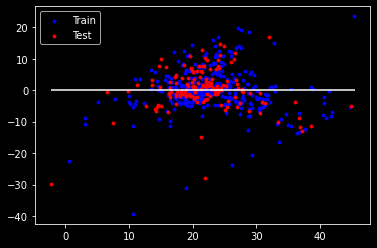

In [85]:
plot_residual(regr, x_train, y_train, x_test, y_test, title="Test Set")